<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### Data inspection, cleaning and preliminary feature engineering

In [2]:
#Set options so pandas stops hiding rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

In [4]:
# A:
#Let's look at the data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Data types look OK
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
#We have quite a few null values though
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
house[house.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [10]:
#Several of the columns are quality ratings, these can be converted to a 0-5 scale
#First find the columns that use the Ex,Gd,TA,Fa,Po,None quality scale
qualities = []
for col in house.columns:
    if 'Gd' in house[col].values:
        qualities.append(col)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [11]:
qualities

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [12]:
#Now map these ratings to a numerical scale
for col in qualities:
    house[col] = house[col].map({'Ex':5,
                                 'Gd':4,
                                 'TA':3,
                                 'Av':3,
                                 'Mn':2,
                                 'Fa':2,
                                 'No':1,
                                 'Po':1,
                                 np.nan:0})

In [13]:
house[qualities]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,1,5,4,0,3,3,0
1,3,3,4,3,4,5,3,3,3,3,0
2,4,3,4,3,2,5,4,3,3,3,0
3,3,3,3,4,1,4,4,4,3,3,0
4,4,3,4,3,3,5,4,3,3,3,0
5,3,3,4,3,1,5,3,0,3,3,0
6,4,3,5,3,3,5,4,4,3,3,0
7,3,3,4,3,2,5,3,3,3,3,0
8,3,3,3,3,1,4,3,3,2,3,0
9,3,3,3,3,1,5,3,3,4,3,0


In [14]:
#Fill in null values in LotFrontage as 0, presumably these null values indicate that these properties do not have a street
#frontage?
house['LotFrontage'].fillna(0,inplace=True)

In [15]:
#Looking at the column descriptions, I think it makes sense to replace the remaining null values with a string 'None' to indicate
#that the house in question does not have these features.
house.fillna('None',inplace=True)

In [16]:
#We no longer have any null values.
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [17]:
#Now let's narrow the data down to only residential properties
house['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [18]:
#We've only got residential categories and some commercial, listed as C (all). Let's exclude those.
house = house[house['MSZoning'] != 'C (all)']

### EDA

In [19]:
#Let's start with a quick glance at the summary statistics for all tables.
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1450.00000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,57.54000,10523.831724,6.114483,5.582069,1971.593103,1985.049655,3.400690,3.084828,3.492414,2.935862,1.630345,445.162759,46.870345,567.375862,1059.408966,4.150345,1164.773103,347.394483,5.531034,1517.698621,0.427586,0.057241,1.568966,0.384828,2.870345,1.046207,3.516552,6.522069,0.616552,1.835172,1.770345,473.277931,2.813103,2.812414,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,0.017931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,34.71992,10012.185355,1.372860,1.107330,30.022696,20.552319,0.572066,0.349076,0.878552,0.552949,1.069001,456.353871,161.828458,442.584978,439.207322,0.959218,386.646095,437.094261,46.932966,525.154207,0.519394,0.238249,0.549549,0.503450,0.814645,0.219643,0.662566,1.625324,0.644991,1.810484,0.745136,212.687621,0.717691,0.714136,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,0.269874,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,0.00000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,41.25000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,223.000000,796.000000,3.000000,882.500000,0.000000,0.000000,1131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,336.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,63.00000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,3.000000,3.000000,4.000000,3.000000,1.000000,384.000000,0.000000,475.000000,992.000000,5.000000,1088.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,2.000000,480.000000,3.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,79.00000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,4.000000,3.000000,4.000000,3.000000,2.000000,713.750000,0.000000,808.000000,1301.500000,5.000000,1392.000000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2.000000,576.000000,3.000000,3.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5644.000000,1474.0000

Our target variable, SalePrice is probably the most interesting thing to look at first. We have a mean value that's only a little higher than our median value, possibly suggesting the distribution will be close to normal. Minimum price is 37000, 
maximum is 755000, so we have quite a wide spread. Let's have a look at some visualisations for this variable.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sale price (USD)')

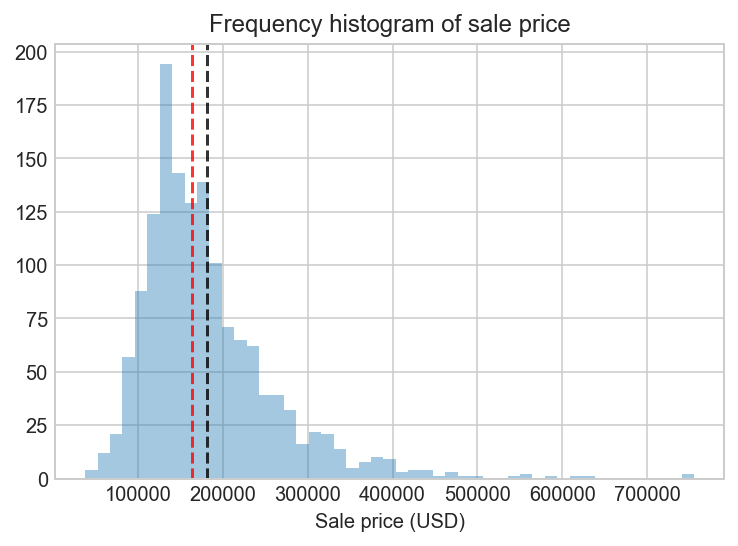

In [20]:
sns.distplot(house['SalePrice'],kde=False)
plt.axvline(x=house['SalePrice'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=house['SalePrice'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.title('Frequency histogram of sale price')
plt.xlabel('Sale price (USD)')

Text(0.5,0,'Sale price (USD))')

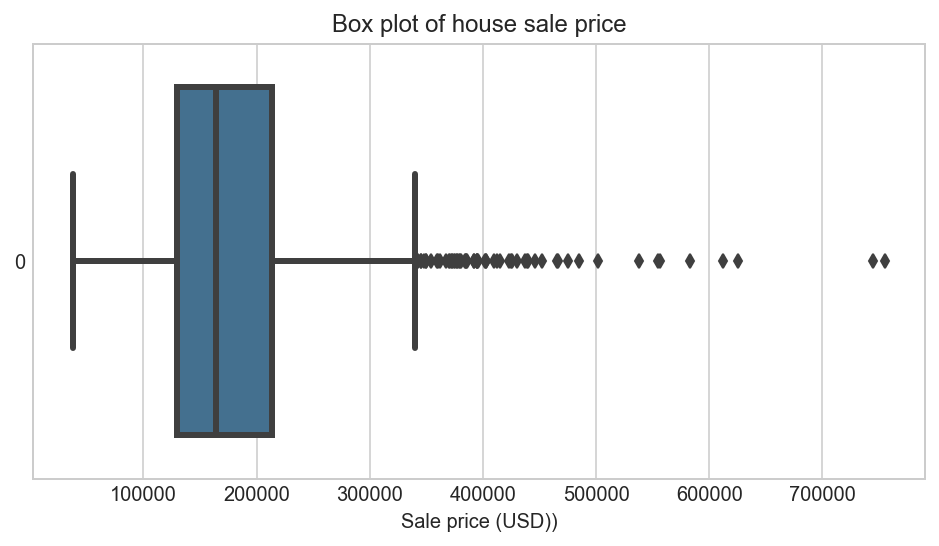

In [21]:
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=house['SalePrice'], orient='h', fliersize=5, 
                 linewidth=3, saturation=0.5)
plt.title('Box plot of house sale price')
plt.xlabel('Sale price (USD))')

Both the distribution histogram and the boxplot show a positively skewed distribution for sale price. Most houses sell for between approximately 130000 and 22000 or so, with a long tail of very expensive houses. This is not terribly surprising, as this is how the housing market often works. Most houses are around the mean/median price but the upper limit on luxury houses is very high.

This will be worth keeping in mind when interpreting our linear regression models but may not require us to transform our data straight away. A target variable with a skewed distribution does not necessarily violate the assumptions of linear regression, so long as the errors are normally distributed.

A quick look at one of the other variables to gauge how the distribution of price relates to the actual houses in the data. Let's say, the LotArea variable.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Lot size in square feet')

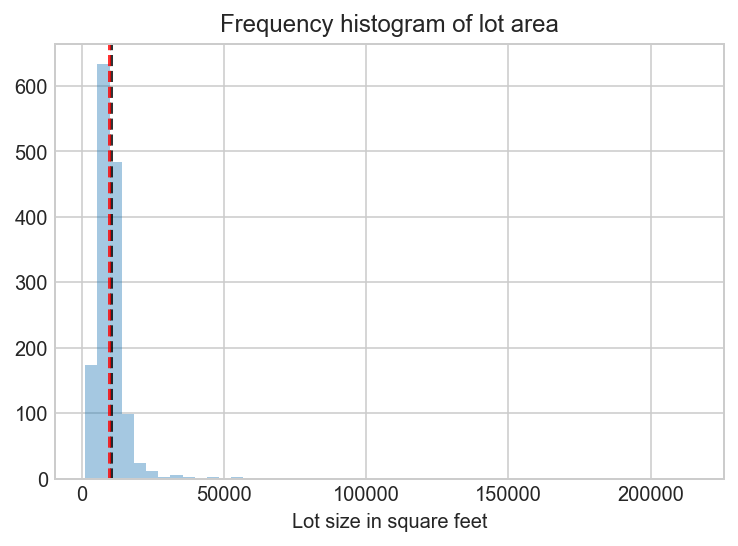

In [22]:
sns.distplot(house['LotArea'],kde=False)
plt.axvline(x=house['LotArea'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=house['LotArea'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.title('Frequency histogram of lot area')
plt.xlabel('Lot size in square feet')

Text(0.5,0,'Lot area in square feet')

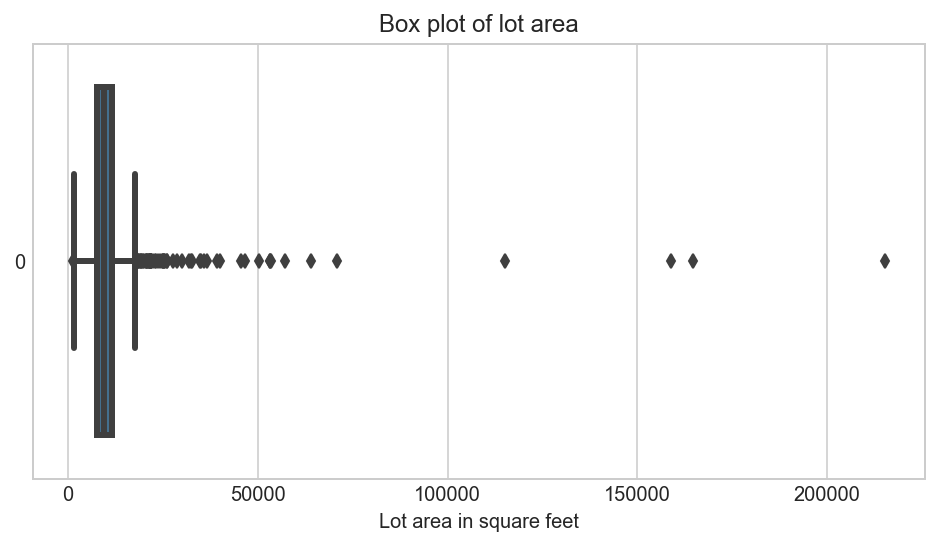

In [23]:
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=house['LotArea'], orient='h', fliersize=5, 
                 linewidth=3, saturation=0.5)
plt.title('Box plot of lot area')
plt.xlabel('Lot area in square feet')

We have a similar distribution in lot sizes for the houses in this dataset, with a concentration of houses down the low end of the scale and a few outlying houses that are on significantly larger lots than the rest. Given the similarity of distributions in these two variables, the next logical step is to look at the possibility of correlations.

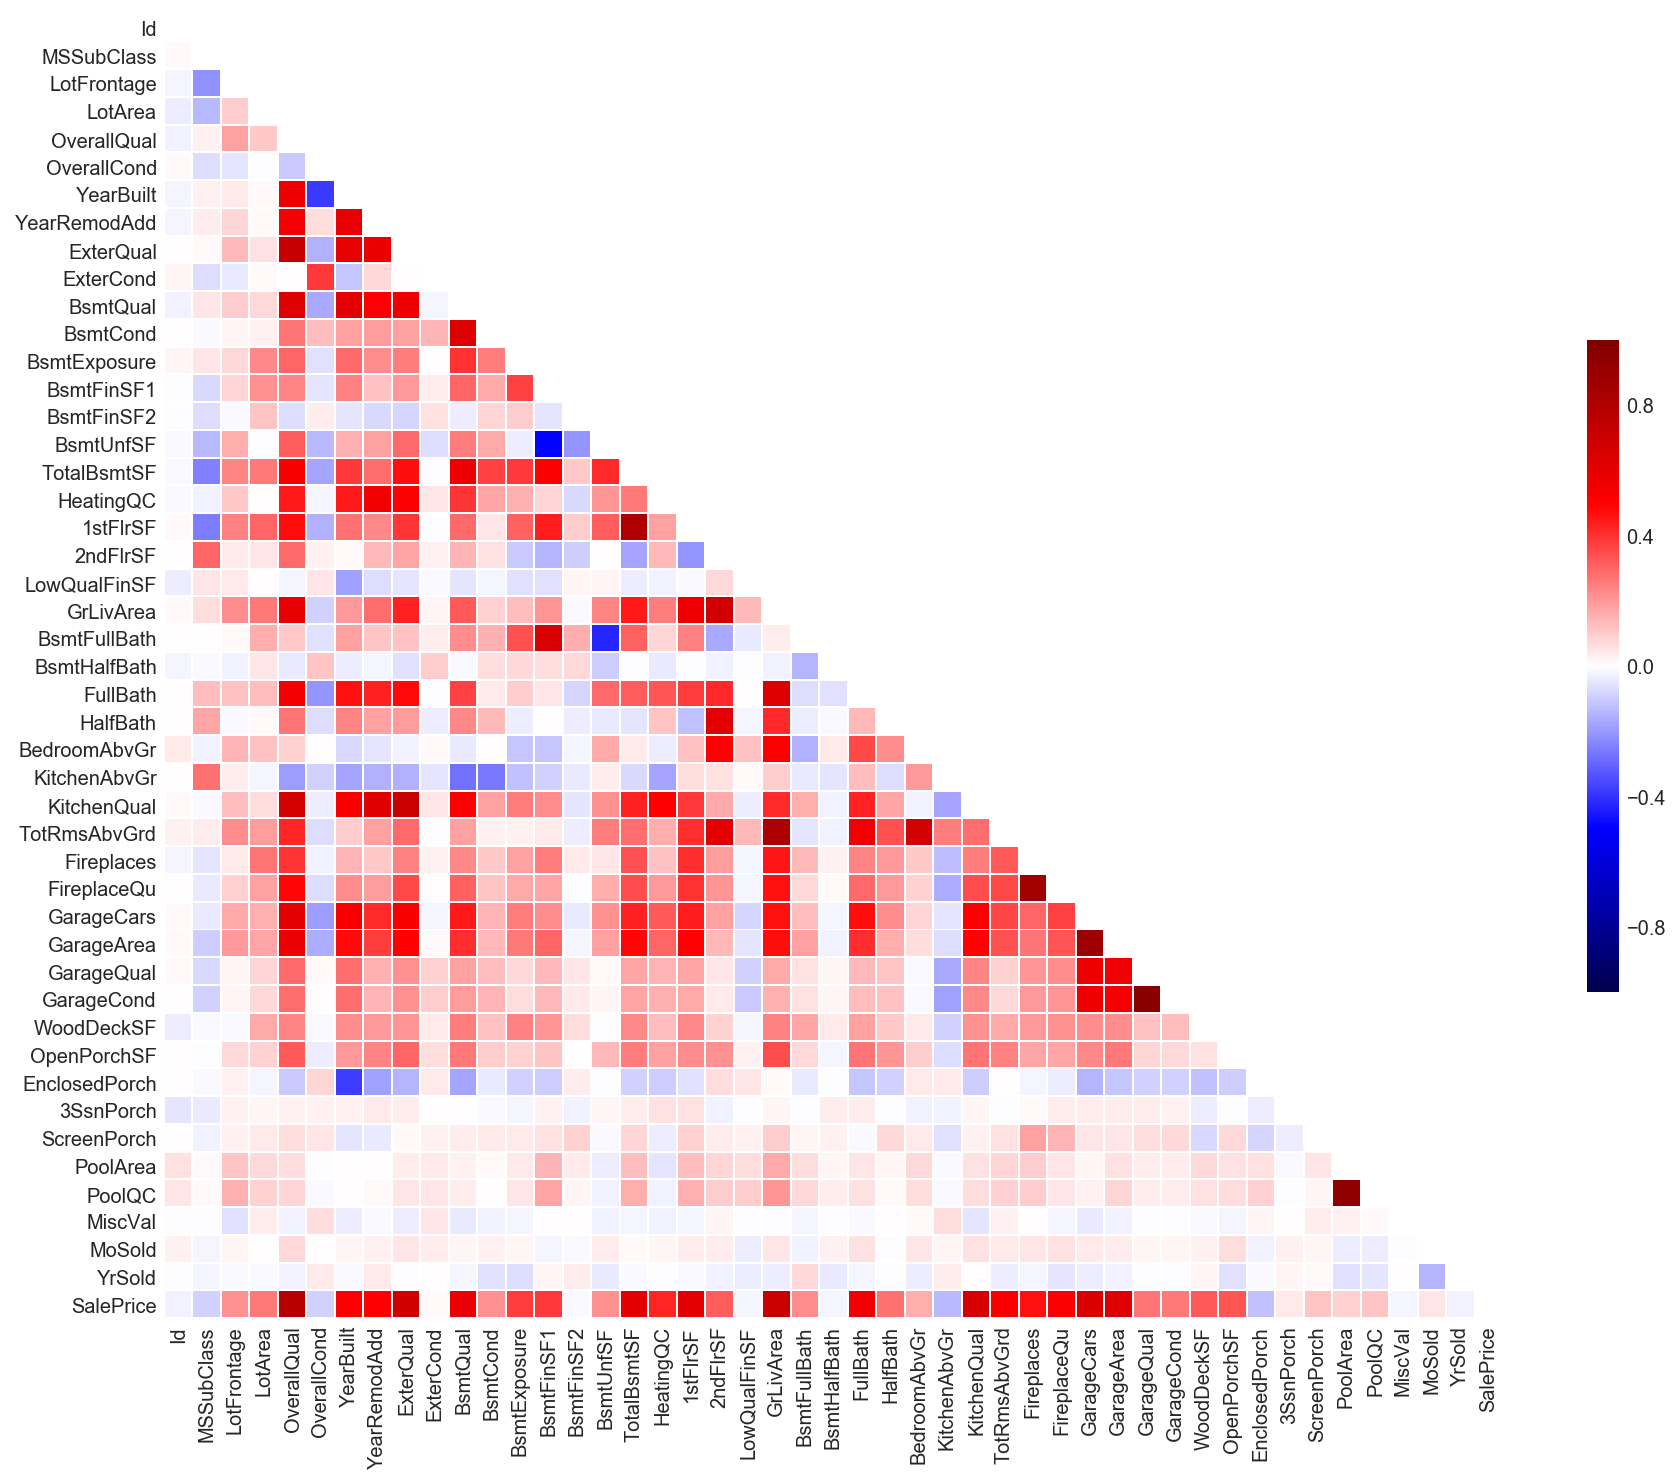

In [24]:
#Create a correlation matrix
fig = plt.figure(figsize=(15,12))
correlations = house.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Make the heatmap
sns.heatmap(correlations, mask = mask, vmin=-1, linewidths=.5, vmax=1, cmap='seismic',cbar_kws={"shrink": .5})

There's a lot of information to absorb in this correlation heatmap, although the immediately interesting things are the different variables that correlate to SalePrice. It looks like the strongest positive correlations occur in relation to Overall Quality, External Quality, Kitchen Quality and a few things relating to area. Interestingly, the LotArea is only moderately correlated with sale price.

### Regression modelling to predict sale price from fixed features

In [25]:
#First, we'll define our target variable
y = house['SalePrice']

In [26]:
#For the predictors, first lets extract those columns that count as 'fixed' features, using the above definition. 
#Let's look at the columns again
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
house.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,1,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500


In [28]:
#We'll make a list of all the features that count as fixed.
fixed_features = ['LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                 'Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle','YearBuilt','Foundation','BsmtExposure',
                 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF',
                 'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                 'Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
house_fixed = house[fixed_features]

In [29]:
#Make dummy variables for the columns that contain string categories.
mask = house_fixed.dtypes == 'object'
other_mask = house_fixed.dtypes != 'object'
house_fixed_objs = house_fixed.loc[:,mask]
house_fixed_other = house_fixed.loc[:,other_mask]
dummies = pd.get_dummies(house_fixed_objs)
print(house_fixed_objs.shape)
print(dummies.shape)
#We've got a *lot* more rows.

(1450, 17)
(1450, 198)


In [30]:
#Let's make this monster predictor matrix.
fixed_predictors = house_fixed_other.join(dummies)

In [31]:
#There's a lot of features now.
fixed_predictors.shape

(1450, 220)

Including dummy variables for the categorical features has left us with over 200 features. We'll probably need to narrow these down to get a good model, but let's just see how we go if we use all the features first.

In [32]:
#Define predictor matrix
X = fixed_predictors

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Since I suspect all these features are going to over-fit the data, let's split the data into training and testing data, 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 11)

In [35]:
#Now we'll fit a linear regression model to the training data. 
#First we standardise the predictors, and test set using the values from the training set
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

In [37]:
#Fit the training data to the model
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#How does the model perform on the training data?
predictions0 = lr.predict(Xs_train)
r20 = r2_score(y_train,predictions0)
r20

0.8923795595551771

In [39]:
#What about on the test data?
predictions = lr.predict(Xs_test)
r2 = r2_score(y_test,predictions)
print(r2)

-8.991198877538123e+23


The model gives a $r^2$ of 0.89 on the training data but an abysmal -8.9 on the test data. As predicted, using all 217 features makes the variance of the model far too high. We'll need to do some feature selection or regularization on this model to improve it.

### Feature selection for linear regression

In [40]:
#We'll start by using recursive feature elimination (RFE) with cross-validation (CV)
from sklearn.feature_selection import RFECV

In [41]:
#Will use RFE with 5-fold cross validation
lr = LinearRegression()
selector = RFECV(lr, step=1, cv=5)
selector.fit(Xs_train, y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [42]:
#Which features were selected?
support = selector.support_
rank = selector.ranking_

RFE_df = pd.DataFrame({'Feature':X.columns, 'Supported':support,'Rank':rank}).sort_values('Rank')

In [43]:
RFE_df.head(20)

,Feature,Supported,Rank
79,Condition2_Artery,True,1
87,BldgType_1Fam,True,1
86,Condition2_RRNn,True,1
84,Condition2_RRAe,True,1
80,Condition2_Feedr,True,1
82,Condition2_PosA,True,1
81,Condition2_Norm,True,1
83,Condition2_PosN,True,1
91,BldgType_TwnhsE,False,2
90,BldgType_Twnhs,False,3


In [44]:
#We've got 11 features that are supported by RFECV. Let's take these and use them as a new predictor matrix and try again.
supported = RFE_df[RFE_df['Supported'] == True]
supported_features = list(supported['Feature'])

#Re-define our X and y
X = fixed_predictors[supported_features]
y = house['SalePrice']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 11)

#Standardise predictors
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

#Fit the model
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#How does the new model go with the training data?
predictions0 = lr.predict(Xs_train)
r20 = r2_score(y_train,predictions0)
r20

0.028950040978644287

In [46]:
#What about the test data?
predictions = lr.predict(Xs_test)
r2 = r2_score(y_test,predictions)
print(r2)

0.024644272164169534


Our variance problem is greatly improved, but the overall performance has dropped, with an $r^2$ value of around 0.02 on our test data. Maybe it would perform better using cross-validation?

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [48]:
#Standardise
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [49]:
#Using cross validation rather than train-test split.
lr = LinearRegression()
scores = cross_val_score(lr, Xs, y, cv = 10)
print(scores)
print(np.mean(scores))

[ 4.36360536e-02  1.79102613e-02  3.15748101e-03 -1.13612337e+00
  1.79763338e-02  1.66319185e-02 -2.11375441e+26  2.12187387e-02
 -8.66745286e-02  1.43290296e-02]
-2.113754408677421e+25


10-fold cross validation yields an even lower $r^2$ value, suggesting the issue is not validation. Perhaps a different approach to reducing variance will yield better results.

### Regularization

In [50]:
X_all = fixed_predictors

In [51]:
ss = StandardScaler()
Xs_all = ss.fit_transform(X_all)

In [52]:
#Try ridge regularization
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet

In [53]:
#Find the best alpha to use
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xs_all,y)
bestalpha = ridge.alpha_
bestalpha

488.02515836544336

In [54]:
optimal_ridge = Ridge(alpha = bestalpha)
optimal_ridge.fit(Xs_all,y)
optimum_cvscores = cross_val_score(optimal_ridge, Xs_all, y, cv = 10)
print(optimum_cvscores)
print(np.mean(optimum_cvscores))

[0.88439137 0.82294629 0.86331235 0.76626703 0.80197485 0.81876714
 0.86254538 0.80945662 0.57030963 0.85894006]
0.8058910707845518


In [55]:
#How does lasso regularization perform?
lasso = LassoCV(n_alphas = 200, cv=10)
lasso.fit(Xs_all,y)
lasso_alpha = lasso.alpha_
print(lasso_alpha)

1110.1087348059934


In [56]:
optimal_lasso = Lasso(alpha=lasso_alpha)

lasso_cvscores = cross_val_score(optimal_lasso, Xs_all,y, cv=10)
print(lasso_cvscores)
print(np.mean(lasso_cvscores))

[0.87331748 0.85217347 0.85530489 0.77661358 0.81419116 0.78270799
 0.87013475 0.80014817 0.50678685 0.87359506]
0.8004973398011817


In [57]:
#Does elastic net do better?
l1_ratios = np.linspace(0.01, 1.0, 25)

elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)

elasticnet.fit(Xs_all,y)

print(elasticnet.alpha_)
print(elasticnet.l1_ratio_)

1110.1087348059934
1.0


In [58]:
elasticnet2 = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
enet_cvscores = cross_val_score(elasticnet2, Xs_all,y, cv=10)
print(enet_cvscores)
print(np.mean(enet_cvscores))

[0.87331748 0.85217347 0.85530489 0.77661358 0.81419116 0.78270799
 0.87013475 0.80014817 0.50678685 0.87359506]
0.8004973398011817


Using regularization on all our features performs significantly better than using feature selection with RFE. Ridge regression gave the highest $r^2$ value at 0.805, although lasso was not far behind. Elastic net performed the same as ridge because the optimal l1 ratio was found to be 1.0 meaning it was effectively just a ridge regression. It is likely there is some collinearity in our predictor variables, which may be why ridge regression performed better.

### Which features are the best predictors of sale price?

In [59]:
coefficients = optimal_ridge.coef_
coef_df = pd.DataFrame({'Feature':fixed_predictors.columns,'Coefficient':coefficients,'Abs':abs(coefficients)}).sort_values('Abs',ascending=False)

In [60]:
coef_df.head(10)

,Feature,Coefficient,Abs
11,GrLivArea,10485.862447,10485.862447
61,Neighborhood_NridgHt,9015.803827,9015.803827
8,1stFlrSF,7446.028112,7446.028112
20,GarageCars,6808.420134,6808.420134
3,BsmtExposure,6626.313887,6626.313887
60,Neighborhood_NoRidge,6567.931112,6567.931112
18,TotRmsAbvGrd,6356.433059,6356.433059
9,2ndFlrSF,6007.516871,6007.516871
67,Neighborhood_StoneBr,5825.770318,5825.770318
7,TotalBsmtSF,5740.635436,5740.635436


The 10 features with the biggest impact on sale price (positive or negative) are listed above. The strongest positive predictor of sale price was the total above-ground living area (in square feet). Unsuprising, as larger houses are clearly more likely to sell for more. Several of the strongest predictors were neighborhoods: Northbridge Heights, Northbridge and Stone Brook, suggesting that houses in certain areas fetch a higher price. Most of the other important features relate to the size of the house, in square feet or number of rooms.

### Can the model predict 2010 sale prices?

In [61]:
#Split the data into training and test.
y_train = house[house['YrSold'] < 2010]['SalePrice']
y_test = house[house['YrSold'] == 2010]['SalePrice']

In [62]:
#Need to join year to existing predictor matrix
fixed_predictors = fixed_predictors.join(house['YrSold'])

In [63]:
X_train = fixed_predictors[fixed_predictors['YrSold'] < 2010].iloc[:,:-1]
X_test = fixed_predictors[fixed_predictors['YrSold'] == 2010].iloc[:,:-1]

In [64]:
#Standardise predictors
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [65]:
#Now we fit the training data to the optimal model
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xs_train,y_train)
bestalpha = ridge.alpha_

optimal_ridge = Ridge(alpha=bestalpha)
optimal_ridge.fit(Xs_train, y_train)

Ridge(alpha=488.02515836544336, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [66]:
#And test how it performs against the test (2010) data
predictions = optimal_ridge.predict(Xs_test)
r2 = r2_score(y_test, predictions)
r2

0.8672668774063541

The model is quite accurate at predicting the 2010 sales prices based on the previous years, with an overall $r^2$ score of 0.87. Represented visually:

r2: 0.8672668774063541


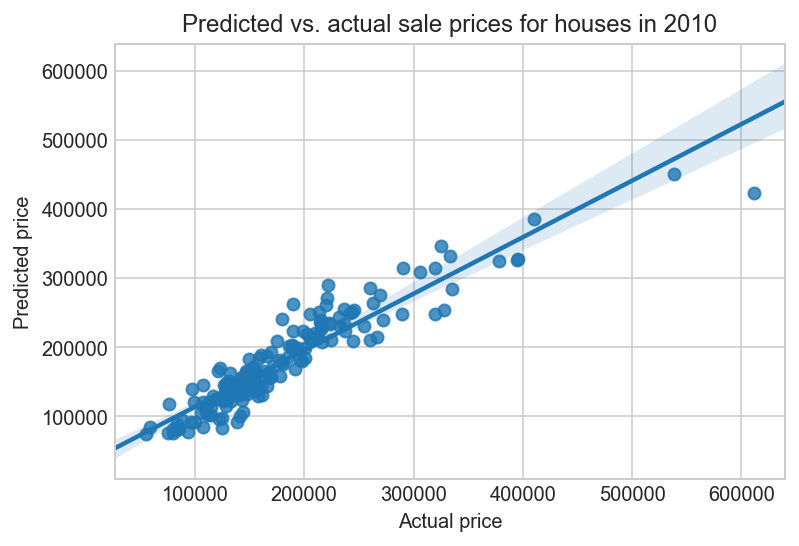

In [67]:
sns.regplot(y_test,predictions)
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.title('Predicted vs. actual sale prices for houses in 2010')
print('r2: ' + str(r2))

In [68]:
#Calculate the residuals from this model and save for later
trainpredictions = optimal_ridge.predict(Xs_train)
train_residuals = y_train - trainpredictions
test_residuals = y_test - predictions


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [69]:
#One of the columns in the house df is the wrong dtype.
house['MasVnrArea'] = house['MasVnrArea'].replace('None',0)
house['MasVnrArea'] = house['MasVnrArea'].astype('int')

In [70]:
# A: Let's begin by determining what our changeable property characteristics are.
nonfixed_features = []
for col in house.columns:
    if col not in fixed_features:
        nonfixed_features.append(col)

In [71]:
#Make a dataframe out of these columns
nonfixed_df = house[nonfixed_features]
nonfixed_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [72]:
nonfixed_df.shape

(1450, 42)

In [73]:
#We've got a few columns we don't want for our predictors, so we'll define our predictors as a slice
nonfixed_predictors = nonfixed_df.iloc[:, 3:-5]
nonfixed_predictors.head(2)

,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal
0,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,4,3,GLQ,Unf,GasA,5,Y,4,Typ,0,3,3,Y,0,61,0,0,0,0,0,None,None,0
1,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,4,3,ALQ,Unf,GasA,5,Y,3,Typ,3,3,3,Y,298,0,0,0,0,0,0,None,None,0


In [74]:
#We need to dummify the string variables
mask = nonfixed_predictors.dtypes == 'object'
other_mask = nonfixed_predictors.dtypes != 'object'
house_nfixed_objs = nonfixed_predictors.loc[:,mask]
house_nfixed_other = nonfixed_predictors.loc[:,other_mask]
dummies = pd.get_dummies(house_nfixed_objs)
print(house_nfixed_objs.shape)
print(dummies.shape)

(1450, 13)
(1450, 91)


In [75]:
#Assemble into final predictor matrix
nonfixed_predictors = house_nfixed_other.join(dummies)
nonfixed_predictors.head(2)

,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,7,5,2003,196,4,3,4,3,5,4,0,3,3,0,61,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
1,6,8,1976,0,3,3,4,3,5,3,3,3,3,298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


### What effect do changeable features have on overall price?

In [76]:
#I'm going to guess that, like above, the number of features we have will lead to over-fitting on a regular linear regression
#model, so I'm going to skip that and try regularization straight away. I'll train and test on 
nonfixed_predictors = nonfixed_predictors.join(house['YrSold'])

In [77]:
y_train = house[house['YrSold'] < 2010]['SalePrice']
y_test = house[house['YrSold'] == 2010]['SalePrice']

In [78]:
X_train = nonfixed_predictors[nonfixed_predictors['YrSold'] < 2010].iloc[:,:-1]
X_test = nonfixed_predictors[nonfixed_predictors['YrSold'] == 2010].iloc[:,:-1]

In [79]:
#Standardise
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [80]:
#Going straight for a ridge regression model like above.
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xs_train,y_train)
bestalpha = ridge.alpha_

optimal_ridge = Ridge(alpha=bestalpha)
optimal_ridge.fit(Xs_train, y_train)

Ridge(alpha=204.90746898158483, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [81]:
predictions = optimal_ridge.predict(Xs_train)
trainr2 = r2_score(y_train, predictions)
predictions2 = optimal_ridge.predict(Xs_test)
testr2 = r2_score(y_test, predictions2)
print('training set r2: ' + str(trainr2))
print('test set r2: ' + str(testr2))

training set r2: 0.7764574050064703
test set r2: 0.7282736907257632


In [82]:
#Can we do better with lasso regression?
lasso = LassoCV(n_alphas = 200, cv=10)
lasso.fit(Xs_train,y_train)
lasso_alpha = lasso.alpha_
print(lasso_alpha)

873.9090811482587


In [83]:
optimal_lasso = Lasso(alpha=lasso_alpha)
optimal_lasso.fit(Xs_train,y_train)

lpredictions = optimal_ridge.predict(Xs_train)
trainr2 = r2_score(y_train, lpredictions)
lpredictions2 = optimal_lasso.predict(Xs_test)
testr2 = r2_score(y_test, lpredictions2)
print('training set r2: ' + str(trainr2))
print('test set r2: ' + str(testr2))

training set r2: 0.7764574050064703
test set r2: 0.7405767771604184


In [84]:
#And elastic net?
l1_ratios = np.linspace(0.01, 1.0, 25)

elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)

elasticnet.fit(Xs_train,y_train)
print(elasticnet.l1_ratio_)

1.0


In [85]:
elasticnet2 = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
elasticnet2.fit(Xs_train, y_train)
predictions = elasticnet2.predict(Xs_train)
trainr2 = r2_score(y_train, predictions)
predictions2 = elasticnet2.predict(Xs_test)
testr2 = r2_score(y_test, predictions2)
print('training set r2: ' + str(trainr2))
print('test set r2: ' + str(testr2))

training set r2: 0.7760882056400338
test set r2: 0.7405767771604184


r2: 0.7405767771604184


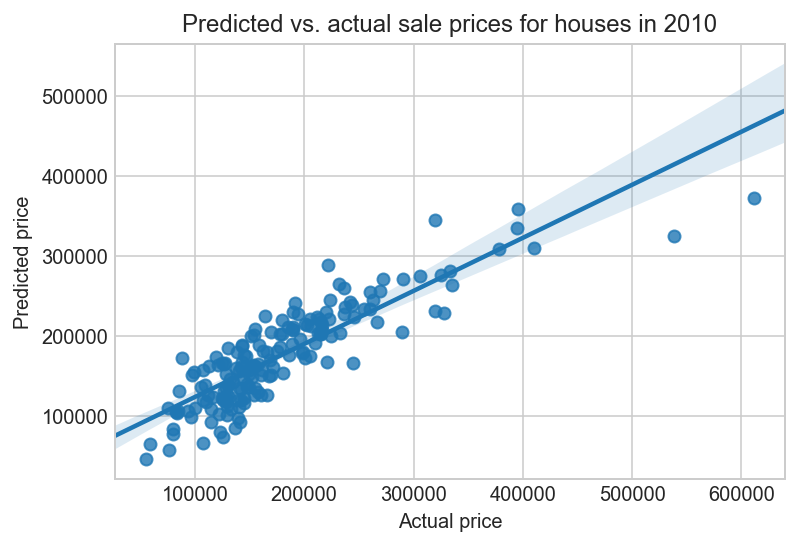

In [86]:
sns.regplot(y_test,lpredictions2)
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.title('Predicted vs. actual sale prices for houses in 2010')
print('r2: ' + str(testr2))

Our best model here seems to be a lasso regression, yielding a $r^2$ value on the test data of 0.74.

### Which changeable features have the greatest impact on sale price?

In [87]:
coefficients = optimal_lasso.coef_
nf_coef_df = pd.DataFrame({'Feature':nonfixed_predictors.iloc[:,:-1].columns,'Coefficient':coefficients,'Abs':abs(coefficients)}).sort_values('Abs',ascending=False)

In [88]:
nf_coef_df.head(10)

,Feature,Coefficient,Abs
0,OverallQual,29210.456626,29210.456626
3,MasVnrArea,13830.811663,13830.811663
6,BsmtQual,10440.649395,10440.649395
10,FireplaceQu,10179.613993,10179.613993
27,RoofMatl_ClyTile,-8873.632477,8873.632477
9,KitchenQual,8592.638199,8592.638199
34,RoofMatl_WdShngl,6801.137405,6801.137405
19,PoolQC,6185.192905,6185.192905
13,WoodDeckSF,5914.511902,5914.511902
4,ExterQual,5614.917725,5614.917725


The coefficients effectively represent the dollar value of changing these features by one unit. For area variables, it represents the value of increasing by one square foot, quality variables represent the value of going up to the next quality category, and binary variables represent the value of having that particular feature vs. not having it.

Overall quality has the biggest impact on sale price, with an increase by 1 category translating to a sale price nearly $30000 higher. Overall quality is a broad metric though and not that helpful in terms of working out what renovations are the most worthwhile. Having a larger masonry veneer also improves sale price considerably, although this might be just correlated with an overall larger house. In terms of prioritising renovations though, it seems that improving the quality of fireplaces, kitchens and basements overall have a significant effect on sale price. Interestingly, having a clay or tile roof seems to negatively impact sale price, while a wood shingle roof positively affects sale price. This might indicate that it would be a good investment to take a house with a clay or tile roof and renovate it to a wood shingle roof to quickly increase the house's value. We'd need more information on how expensive doing these kinds of renovations is before going ahead though, as if the total cost of the renovation is greater than the increase in sale price resulting from it, the renovation may not be worth pursuing.

### How well do the changeable features explain the variance in price predicted from the fixed features?

In [89]:
#We'll approach this by basically using the residuals of our first model as a target variable, and predict using the 
#changeable features. Predictors shouldn't need to change.
y_train = train_residuals 
y_test = test_residuals

In [90]:
#We'll use an elastic net regression model to try and get the best of both ridge and lasso regularization
l1_ratios = np.linspace(0.01, 1.0, 25)

elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)

elasticnet.fit(Xs_train,y_train)
print('l1 ratio used: ' + str(elasticnet.l1_ratio_))

elasticnet2 = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
elasticnet2.fit(Xs_train, y_train)
predictions = elasticnet2.predict(Xs_train)
trainr2 = r2_score(y_train, predictions)
predictions2 = elasticnet2.predict(Xs_test)
testr2 = r2_score(y_test, predictions2)
print('training set r2: ' + str(trainr2))
print('test set r2: ' + str(testr2))

l1 ratio used: 1.0
training set r2: 0.3826826974289923
test set r2: 0.15576255712991116


r2: 0.15576255712991116


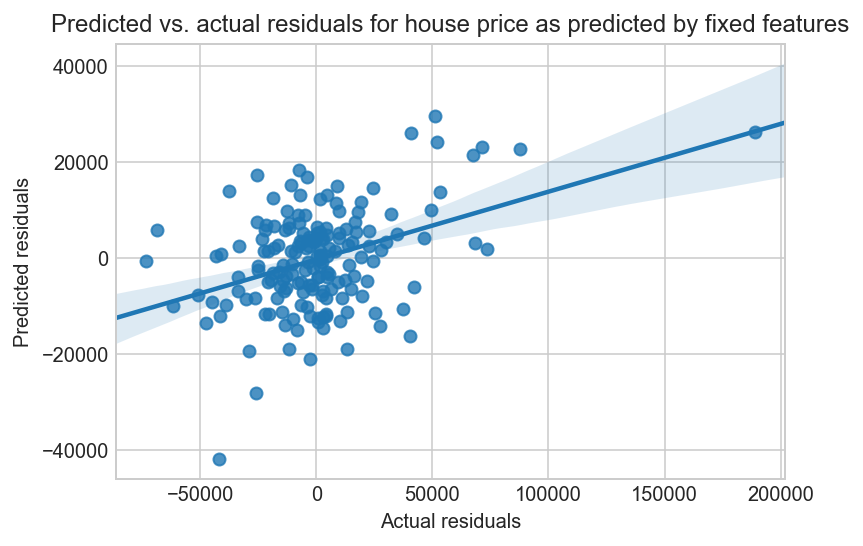

In [91]:
sns.regplot(y_test, predictions2)
plt.ylabel('Predicted residuals')
plt.xlabel('Actual residuals')
plt.title('Predicted vs. actual residuals for house price as predicted by fixed features')
print('r2: ' + str(testr2))

In [92]:
coefficients = elasticnet2.coef_
residual_df = pd.DataFrame({'Feature':nonfixed_predictors.iloc[:,:-1].columns,'Coefficient':coefficients,'Abs':abs(coefficients)}).sort_values('Abs',ascending=False)

In [93]:
residual_df.head(10)

,Feature,Coefficient,Abs
27,RoofMatl_ClyTile,-12889.951424,12889.951424
0,OverallQual,6098.640776,6098.640776
1,OverallCond,5914.541040,5914.541040
34,RoofMatl_WdShngl,5298.280657,5298.280657
19,PoolQC,4555.849624,4555.849624
3,MasVnrArea,2923.760646,2923.760646
9,KitchenQual,2590.295371,2590.295371
22,RoofStyle_Gable,-1998.692429,1998.692429
38,Exterior1st_BrkFace,1925.091873,1925.091873
98,Functional_Typ,1846.658565,1846.658565


These 10 features had the greatest impact on the residuals from our previous model. Once again, we see that the presence of a clay or tile roof had a big negative impact on the predictions made by our first model. This could indicate that houses with good fixed characteristics were being let down by the type of roof. As above, this would suggest that renovating the roof might be a good investment on these houses, depending on the costs of such renovations.

A limitation to bear in mind though is that this model only achieved a $r^2$ value of 0.16 on the test data, which while it is performing 16% better than baseline, is not as strong a model as the others used above. So these non-fixed characteristics might not fully explain the variance seen in our original model. Since the $r^2$ value for the training data was 0.38, we also have a high variance problem. There may be additional features of either the houses, or the housing market that are not accounted for in our dataset that may be playing a role in sale price.

### Conclusions and recommendations

Given that we get a similarly good prediction of overall sale price from the renovate-able features of a house, I would be comfortable in recommending that the real estate company investigate buying up properties large houses in good areas such as Northbridge or Stone Brook that have clay or tile roofs and then renovating them with a wooden shingle roof to increase the property value and sell them on, with the caveat that if the cost of roof renovation exceeds ~$14000 the profit margin may be slim. Secondary priorities would be improving the quality of the pool, quality of the kitchen and area of external masonry.

#### Afterthought: does additional feature elimination improve our over-fitting problem on this model?

In [94]:
#Select features using RFECV
enet = ElasticNet()
selector = RFECV(enet, step=1, cv=5)
selector.fit(Xs_train, y_train)
#Which features were selected?
support = selector.support_
rank = selector.ranking_

In [95]:
#Define new predictors based on features supported by RFECV
RFE_df2 = pd.DataFrame({'Feature':X_train.columns, 'Supported':support,'Rank':rank}).sort_values('Rank')
supported_features = RFE_df2[RFE_df2['Supported'] == True]['Feature']
Xsub_train = nonfixed_predictors[nonfixed_predictors['YrSold'] < 2010][supported_features]
Xsub_test = nonfixed_predictors[nonfixed_predictors['YrSold'] == 2010][supported_features]

In [96]:
ss_sub = StandardScaler()
Xsub_train_n = ss_sub.fit_transform(Xsub_train)
Xsub_test_n = ss_sub.transform(Xsub_test)

In [97]:
#Fit to an elastic net regression model.
l1_ratios = np.linspace(0.01, 1.0, 25)

elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)

elasticnet.fit(Xsub_train_n,y_train)
print('l1 ratio used: ' + str(elasticnet.l1_ratio_))

elasticnet2 = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
elasticnet2.fit(Xsub_train_n, y_train)
predictions = elasticnet2.predict(Xsub_train_n)
trainr2 = r2_score(y_train, predictions)
predictions2 = elasticnet2.predict(Xsub_test_n)
testr2 = r2_score(y_test, predictions2)
print('training set r2: ' + str(trainr2))
print('test set r2: ' + str(testr2))

l1 ratio used: 0.9587500000000001
training set r2: 0.33220550773965996
test set r2: 0.15524805071181413


In [98]:
#Does this model pull out the same important predictors?
coefficients = elasticnet2.coef_
residual_df = pd.DataFrame({'Feature':Xsub_train.columns,'Coefficient':coefficients,'Abs':abs(coefficients)}).sort_values('Abs',ascending=False)
residual_df.head(10)

,Feature,Coefficient,Abs
3,RoofMatl_ClyTile,-8452.837486,8452.837486
18,OverallCond,4261.412558,4261.412558
4,RoofMatl_WdShngl,4127.412692,4127.412692
0,OverallQual,3583.880354,3583.880354
21,KitchenQual,2337.169525,2337.169525
19,MasVnrArea,2067.268015,2067.268015
7,PoolQC,2041.622167,2041.622167
14,Functional_Typ,1963.071791,1963.071791
5,Exterior1st_BrkFace,1812.838969,1812.838969
20,ExterQual,1424.627036,1424.627036


Overall, additional feature elimination using RFECV did not make a big difference to the performance of the model on the test data. While the magnitude and order of the coefficients was different, the kinds of features that appear in the top 10 are much the same. I stand by the conclusions and recommendations I outlined above.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [99]:
# A: Just how imbalanced are our classes?
house['SaleCondition'].value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

So the overwhelming majority of sales are in the 'Normal' category. The Abnorml category isn't the smallest one but with only 96 entries it is significantly outnumbered by normal sales.

### Defining variables

In [100]:
#We only really care about Abnorml vs not abnormal, so let's create a binary column to be our target variable
house['abnormal'] = house['SaleCondition'].apply(lambda x: 1 if x == 'Abnorml' else 0)

In [101]:
#This will be our target variable. Train/test split by year as above.
y_train = house[house['YrSold'] < 2010]['abnormal']
y_test = house[house['YrSold'] == 2010]['abnormal']

In [102]:
#What's our baseline accuracy going to be with this class imbalance?
baseline = len(y[y==0])/len(y)
baseline

0.0

In [103]:
# 93% is the baseline accuracy we want to beat. Let's put together our predictor matrix. For starters I'll use *everything*.
all_predictors = fixed_predictors.iloc[:,:-1].join(nonfixed_predictors.iloc[:,:-1])
all_predictors = all_predictors.join(house['YrSold'])

In [104]:
X_train = all_predictors[all_predictors['YrSold'] < 2010].iloc[:,:-1]
X_test = all_predictors[all_predictors['YrSold'] == 2010].iloc[:,:-1]

In [105]:
#Standardise
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Attempting Logistic Regression

In [106]:
#Fit all this to a logistic regression model
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import GridSearchCV

In [107]:
#Do a GridSearch for best params
params = {'penalty':['l1','l2'],'C':[1,5,10], 'solver':['liblinear']}

logreg = LogisticRegression()
logreg_gs = GridSearchCV(logreg, params, cv=5)
logreg_gs.fit(Xs_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 5, 10], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
print(logreg_gs.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [109]:
#Go ahead with our best model
logreg_best = logreg_gs.best_estimator_
logreg_best.fit(Xs_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

             precision    recall  f1-score   support

          0       0.95      0.96      0.95       163
          1       0.00      0.00      0.00         9

avg / total       0.90      0.91      0.90       172

baseline accuracy: 0.0
model accuracy: 0.9127906976744186


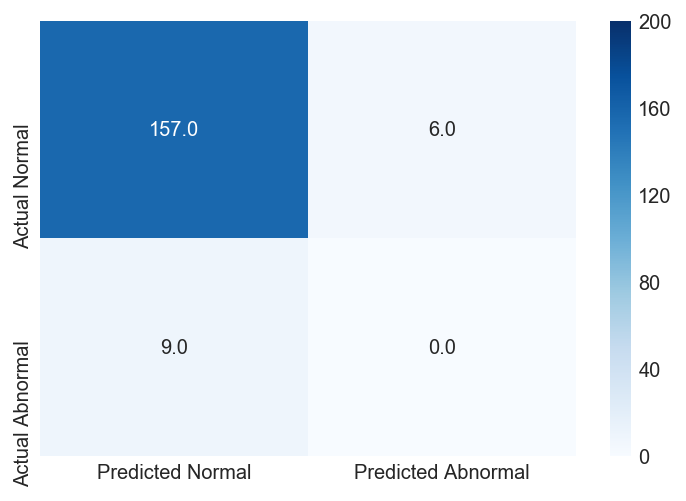

In [111]:
#Print out some metrics and a confusion matrix for this model
predictions = logreg_best.predict(Xs_test)
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 200, vmin = 0, 
            xticklabels = ['Predicted Normal', 'Predicted Abnormal'], yticklabels = ['Actual Normal', 'Actual Abnormal'])
print(classification_report(y_test, predictions))
print('baseline accuracy: ' + str(baseline))
print('model accuracy: ' + str(accuracy_score(y_test, predictions)))

So, without any particular steps taken to address the class imbalance, the logistic regression model isn't performing that well.
We are actually below our basline accuracy, and the confusion matrix is showing us that while the model guessed 6 of the test sales as abnormal, these were all normal sales in reality. None of the 9 actual abnormal sales were accurately predicted by the model.

### Logistic Regression with Random Undersampling

One way to potentially address class imbalances is to randomly undersample the dominant class.

In [112]:
normal = house[house['abnormal'] == 0]
abnormal = house[house['abnormal'] == 1]
print(len(normal))
print(len(abnormal))

1354
96


In [113]:
#Randomly sample ~40% of the normal sales
normal_sample = normal.sample(542, random_state = 11)

In [114]:
#Make predictor matrix from undersampled data
house_usample = pd.concat([normal_sample, abnormal])
usample_predictors = house_usample.iloc[:, 1:-4]

mask = usample_predictors.dtypes == 'object'
other_mask = usample_predictors.dtypes != 'object'
usample_objs = usample_predictors.loc[:,mask]
usample_other = usample_predictors.loc[:,other_mask]
dummies = pd.get_dummies(usample_objs)
usample_predictors = usample_other.join(dummies)

In [115]:
usample_baseline = len(house_usample[house_usample['abnormal'] == 0])/len(house_usample)
usample_baseline

0.8495297805642633

In [116]:
#Define target and training variables
y_train = house_usample[house_usample['YrSold'] < 2010]['abnormal']
y_test = house_usample[house_usample['YrSold'] == 2010]['abnormal']

In [117]:
X_train = usample_predictors[usample_predictors['YrSold'] < 2010]
X_test = usample_predictors[usample_predictors['YrSold'] == 2010]

In [118]:
X_train.drop('YrSold', axis=1,inplace=True)
X_test.drop('YrSold', axis=1,inplace=True)

C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [119]:
#Standardise
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [120]:
#Grid search and model as above
params = {'penalty':['l1','l2'],'C':[1,5,10], 'solver':['liblinear']}

logreg = LogisticRegression()
logreg_gs = GridSearchCV(logreg, params, cv=5)
logreg_gs.fit(Xs_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 5, 10], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       475
          1       0.95      0.72      0.82        87

avg / total       0.95      0.95      0.95       562

baseline accuracy: 0.8495297805642633
model accuracy: 0.9519572953736655


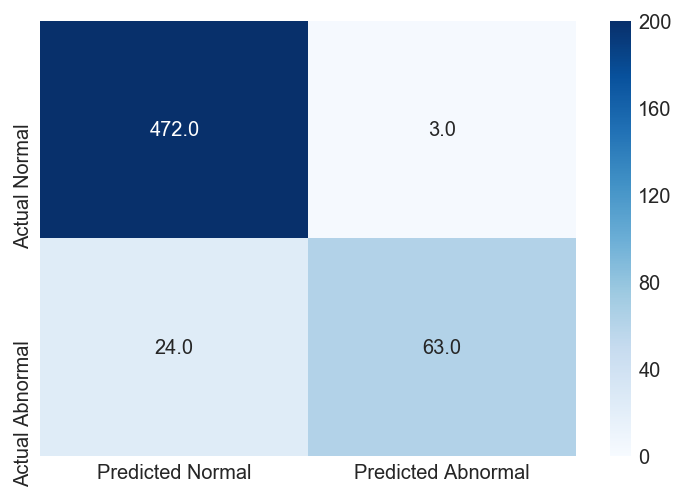

In [121]:
logreg_best = logreg_gs.best_estimator_
logreg_best.fit(Xs_train, y_train)
predictions = logreg_best.predict(Xs_train)
cm = confusion_matrix(y_train,predictions)
sns.heatmap(cm, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 200, vmin = 0, 
            xticklabels = ['Predicted Normal', 'Predicted Abnormal'], yticklabels = ['Actual Normal', 'Actual Abnormal'])
print(classification_report(y_train, predictions))
print('baseline accuracy: ' + str(usample_baseline))
print('model accuracy: ' + str(accuracy_score(y_train, predictions)))

             precision    recall  f1-score   support

          0       0.89      0.88      0.89        67
          1       0.20      0.22      0.21         9

avg / total       0.81      0.80      0.81        76

baseline accuracy: 0.8495297805642633
model accuracy: 0.8026315789473685


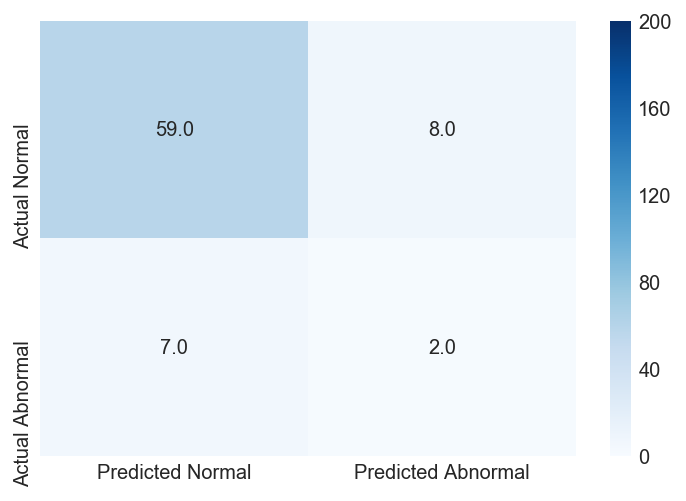

In [122]:
predictions = logreg_best.predict(Xs_test)
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 200, vmin = 0, 
            xticklabels = ['Predicted Normal', 'Predicted Abnormal'], yticklabels = ['Actual Normal', 'Actual Abnormal'])
print(classification_report(y_test, predictions))
print('baseline accuracy: ' + str(usample_baseline))
print('model accuracy: ' + str(accuracy_score(y_test, predictions)))

The model is performing better than baseline on the training set, and worse on the test set, suggesting we might have an over-fitting problem. Perhaps we are trying to use too many features here, and should apply some feature selection methods first.

### Feature selection to reduce over-fitting

In [123]:
#Will use RFE with 5-fold cross validation
logreg = LogisticRegression()
selector = RFECV(logreg, step=1, cv=5)
selector.fit(Xs_train, y_train)
#Which features were selected?
support = selector.support_
rank = selector.ranking_

In [124]:
RFE_df = pd.DataFrame({'Feature': X_train.columns, 'Supported':support,'Rank':rank}).sort_values('Rank')
RFE_df.head(20)

,Feature,Supported,Rank
87,Neighborhood_NridgHt,True,1
58,LandContour_HLS,False,2
295,GarageYrBlt_2004.0,False,3
42,PoolQC,False,4
41,PoolArea,False,5
261,GarageYrBlt_1970.0,False,6
308,PavedDrive_P,False,7
6,YearRemodAdd,False,8
183,BsmtFinType2_None,False,9
245,GarageYrBlt_1954.0,False,10


In [125]:
#Select # of features to use, ranked using RFECV
RFE_features = list(RFE_df.head(10).Feature)
RFEX_train = X_train[RFE_features]
RFEX_test = X_test[RFE_features]

In [126]:
#Standardise again
ss = StandardScaler()
RFEXs_train = ss.fit_transform(RFEX_train)
RFEXs_test = ss.transform(RFEX_test)

In [127]:
params = {'penalty':['l1','l2'],'C':[1,5,10], 'solver':['liblinear']}

logreg = LogisticRegression()
logreg_gs = GridSearchCV(logreg, params, cv=5)
logreg_gs.fit(RFEXs_train,y_train)
print(logreg_gs.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


             precision    recall  f1-score   support

          0       0.85      1.00      0.92       475
          1       1.00      0.02      0.04        87

avg / total       0.87      0.85      0.78       562

baseline accuracy: 0.8495297805642633
model accuracy: 0.8487544483985765


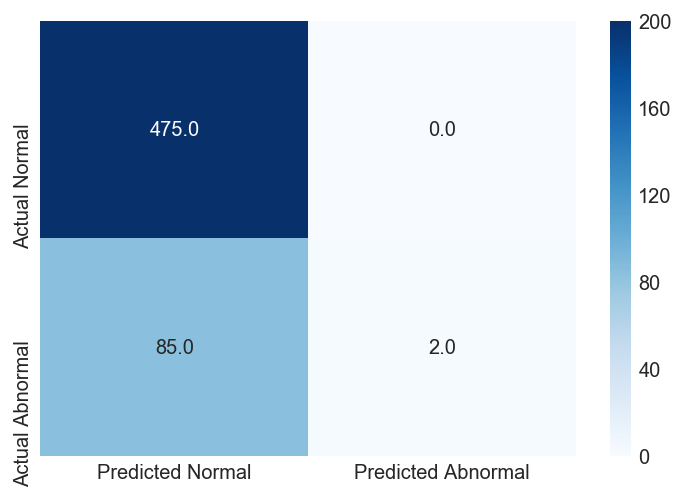

In [128]:
logreg_best = logreg_gs.best_estimator_
logreg_best.fit(RFEXs_train, y_train)
predictions = logreg_best.predict(RFEXs_train)
cm = confusion_matrix(y_train,predictions)
sns.heatmap(cm, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 200, vmin = 0, 
           xticklabels = ['Predicted Normal', 'Predicted Abnormal'], yticklabels = ['Actual Normal', 'Actual Abnormal'])
print(classification_report(y_train, predictions))
print('baseline accuracy: ' + str(usample_baseline))
print('model accuracy: ' + str(accuracy_score(y_train, predictions)))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94        67
          1       0.00      0.00      0.00         9

avg / total       0.78      0.88      0.83        76

baseline accuracy: 0.8495297805642633
model accuracy: 0.881578947368421


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


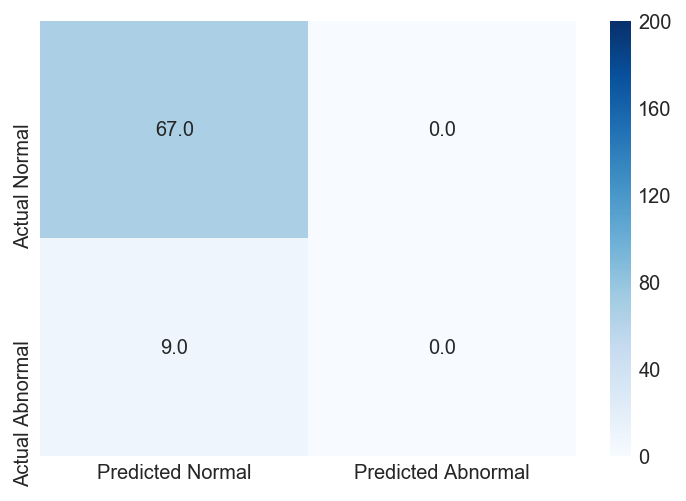

In [129]:
predictions = logreg_best.predict(RFEXs_test)
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 200, vmin = 0, 
            xticklabels = ['Predicted Normal', 'Predicted Abnormal'], yticklabels = ['Actual Normal', 'Actual Abnormal'])
print(classification_report(y_test, predictions))
print('baseline accuracy: ' + str(usample_baseline))
print('model accuracy: ' + str(accuracy_score(y_test, predictions)))

In terms of accuracy, the model is now performing slightly better than baseline. However the confusion matrix suggests our model is still not doing well at predicting abnormal sales, which is the goal of this exercise. Our model is no longer overfitting but it lacks power.

There would be a number of options going forward from this point. Different methods of reducing overfitting are possible, such as feature selection using Select K-best or even reducing the features to principle components using PCA. Alternative methods of addressing the class imbalance could also be investigated, such as bootstrapping and oversampling the abnormal sales data or using another oversampling technique such as SMOTE. Finally, Logistic regression may not be the best algorith to use for this problem. Other models such as K nearest-neighbours or support-vector machines (SVM) might perform better on this data as well.